## Retail Churn Exploratory Data Analysis

In [52]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

col_names = ['user_id', 'gender', 'address', 'store_id', 'trans_id', 'timestamp', 'item_id', 'quantity', 'dollar']
churn = pd.read_csv("retail-churn.csv", sep = ",", skiprows = 1, names = col_names)

print('Loaded {:,} data rows.'.format(churn.shape[0]))

churn.head()

Loaded 252,204 data rows.


,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar
0,101981,F,E,2860,818463,11/1/2000 0:00,4.710000e+12,1,37
1,101981,F,E,2861,818464,11/1/2000 0:00,4.710000e+12,1,17
2,101981,F,E,2862,818465,11/1/2000 0:00,4.710000e+12,1,23
3,101981,F,E,2863,818466,11/1/2000 0:00,4.710000e+12,1,41
4,101981,F,E,2864,818467,11/1/2000 0:00,4.710000e+12,8,288


In [33]:
# Call DataFrame object method dtypes for column names and their data types
churn.dtypes

user_id        int64
gender        object
address       object
store_id       int64
trans_id       int64
timestamp     object
item_id      float64
quantity       int64
dollar         int64
dtype: object

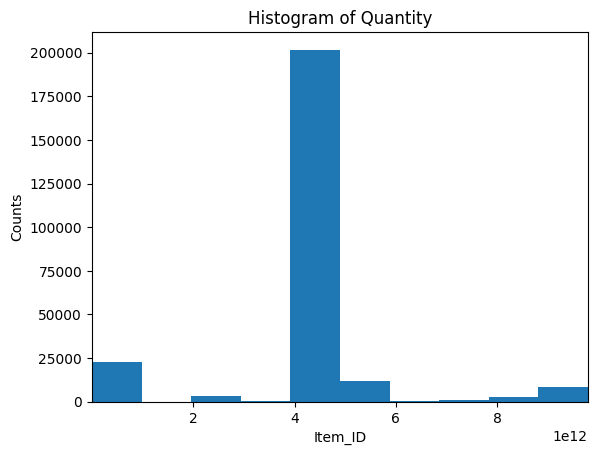

In [34]:
# Look at distribution of one of the columns, Item_ID 
import matplotlib.pyplot as plt
plt.hist(churn['item_id'].to_list())
plt.xlabel('Item_ID')
plt.ylabel('Counts')
plt.title('Histogram of Quantity')
plt.xlim(churn['item_id'].min(), churn['item_id'].max())
plt.show()

In [35]:
# Convert dtypes to appropriate dtypes for analysis
churn = churn.convert_dtypes()
# Convert dtype of timestamp column to a datetime column
churn['timestamp'] = pd.to_datetime(churn['timestamp'])
churn.dtypes

c:\Users\james\anaconda3\envs\data\lib\site-packages\pandas\core\dtypes\cast.py:1079: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():
c:\Users\james\anaconda3\envs\data\lib\site-packages\pandas\core\dtypes\cast.py:1104: RuntimeWarning: invalid value encountered in cast
  if (arr.astype(int) == arr).all():


user_id               Int64
gender       string[python]
address      string[python]
store_id              Int64
trans_id              Int64
timestamp    datetime64[ns]
item_id             Float64
quantity              Int64
dollar                Int64
dtype: object

In [36]:
# Find unique values for each column in DataFrame by iterating over columns
for column in churn.columns:
    unique = churn[str(column)].unique() 
    print("Unique rows found for column {}:".format(column) +
          "\n{}".format(unique) +
         "\n{} unique values found in rows of column \n".format(len(unique)))

Unique rows found for column user_id:
<IntegerArray>
[ 101981,  164252,  166324,  191050,  196734,  214544,  308359,  336796,
  347877,  426541,
 ...
 2117461, 2151083, 2174266, 2174549, 2178202, 2179315, 2179346, 2179414,
 2179469, 2179605]
Length: 10000, dtype: Int64
10000 unique values found in rows of column 

Unique rows found for column gender:
<StringArray>
['F', 'G', 'I', 'C', 'J', 'E', 'D', 'H', 'K', 'B', 'A']
Length: 11, dtype: string
11 unique values found in rows of column 

Unique rows found for column address:
<StringArray>
['E', 'H', 'D', 'F', 'G', 'C', 'B', 'A']
Length: 8, dtype: string
8 unique values found in rows of column 

Unique rows found for column store_id:
<IntegerArray>
[  2860,   2861,   2862,   2863,   2864,   2865,   2866,   2867,   2868,
   2869,
 ...
 251833, 251834, 251835, 251836, 251837, 251838, 251839, 251840, 251841,
 251842]
Length: 252204, dtype: Int64
252204 unique values found in rows of column 

Unique rows found for column trans_id:
<IntegerAr

In [37]:
# Evaluate if any quantities are negative
churn.loc[churn['quantity'] < 0]

,user_id,gender,address,store_id,trans_id,timestamp,item_id,quantity,dollar


**We found that no quantities are less than zero, this should be the case since a quantity really should not be less than one. We should check for this and account for it if there is such a case where data was input mistakenly.**

In [38]:
# Determine and print range of days that data is corresponding to
print("Range is {}".format(churn['timestamp'].max().date() - churn['timestamp'].min().date()) 
      + ": From {}".format(churn['timestamp'].min().date())
      + " to {}".format(churn['timestamp'].max().date()))

Range is 119 days, 0:00:00: From 2000-11-01 to 2001-02-28


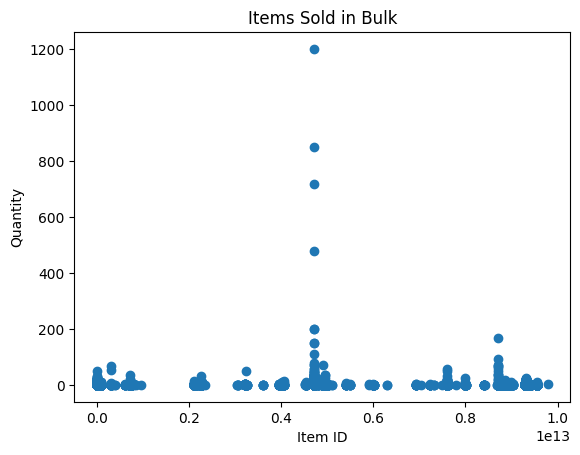

In [39]:
# Make slice of DataFrame to find quantity that are sold greater than 1
bulk_items = churn.loc[churn['quantity'] > 1, ['item_id', 'quantity']]
plt.scatter(bulk_items['item_id'], bulk_items['quantity'])
plt.xlabel('Item ID')
plt.ylabel('Quantity')
plt.title("Items Sold in Bulk")
plt.show()

In [40]:
# Locate quantity greater than 1000 to filter out item id that sells at the highest quantity
high_volume_items = churn.loc[churn['quantity'] > 1000, ['item_id', 'quantity']]
print("Appears that Item ID {} is sold in bulk the most out of the other items in the store.".format(high_volume_items['item_id'].values[0]))

Appears that Item ID 4710000000000.0 is sold in bulk the most out of the other items in the store.


In [41]:
# Create new columns to separate out timestamp by day, month, year
churn['day'] = pd.DatetimeIndex(churn['timestamp']).day
churn['month'] = pd.DatetimeIndex(churn['timestamp']).month
churn['year'] = pd.DatetimeIndex(churn['timestamp']).year

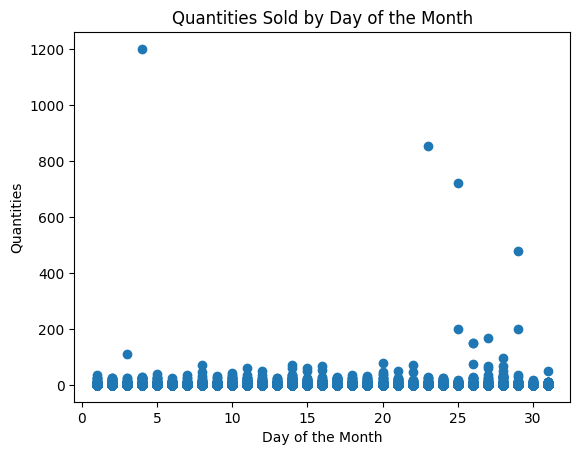

In [42]:
# Plot day-by-day of quantity sold
plt.scatter(churn['day'], churn['quantity'])
plt.xlabel('Day of the Month')
plt.ylabel('Quantities')
plt.title("Quantities Sold by Day of the Month")
plt.show()

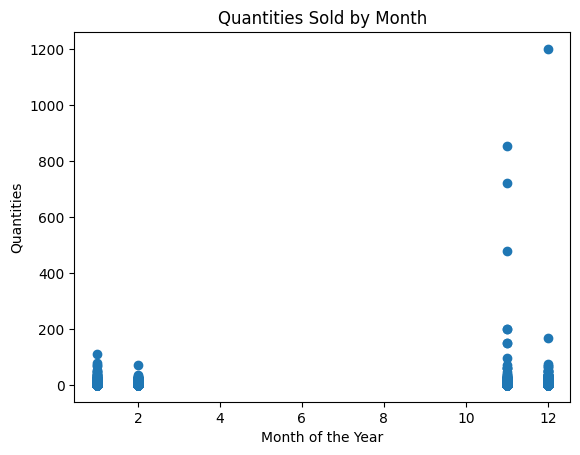

In [43]:
# Plot month-by-month of quantity sold
plt.scatter(churn['month'], churn['quantity'])
plt.xlabel('Month of the Year')
plt.ylabel('Quantities')
plt.title("Quantities Sold by Month")
plt.show()

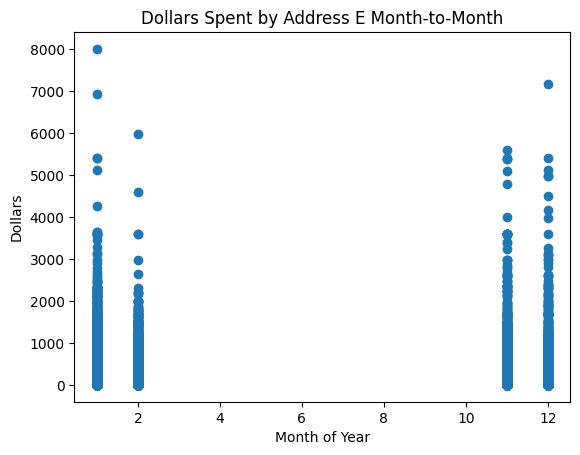

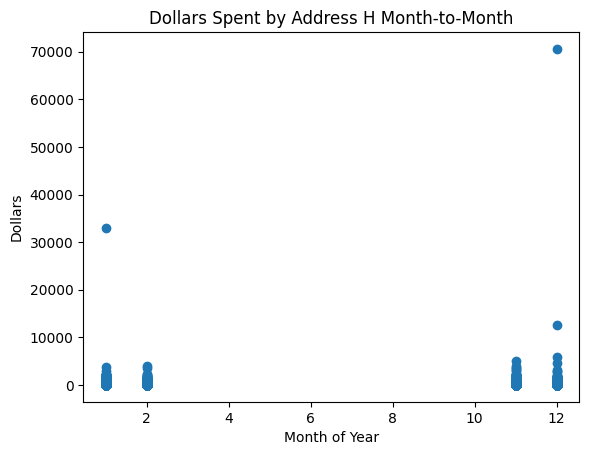

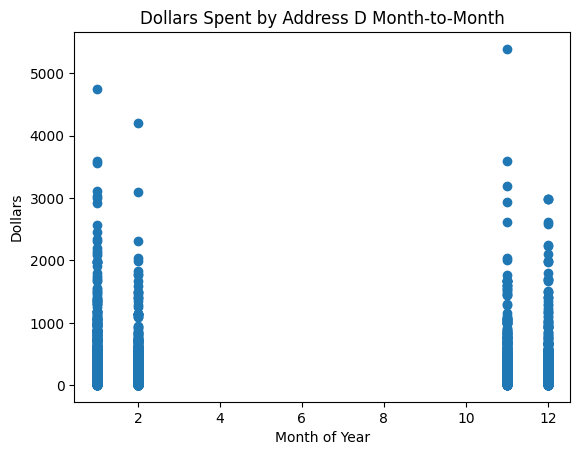

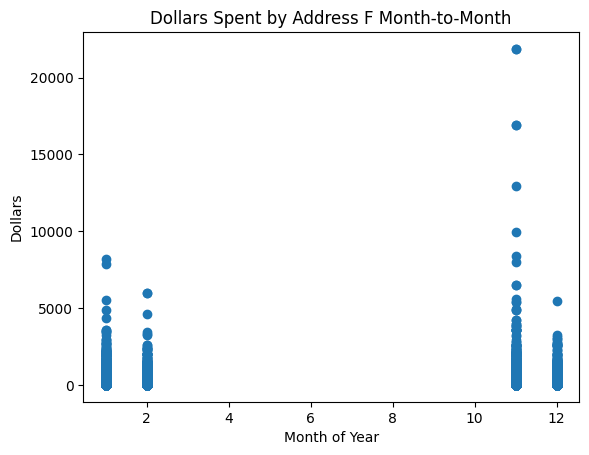

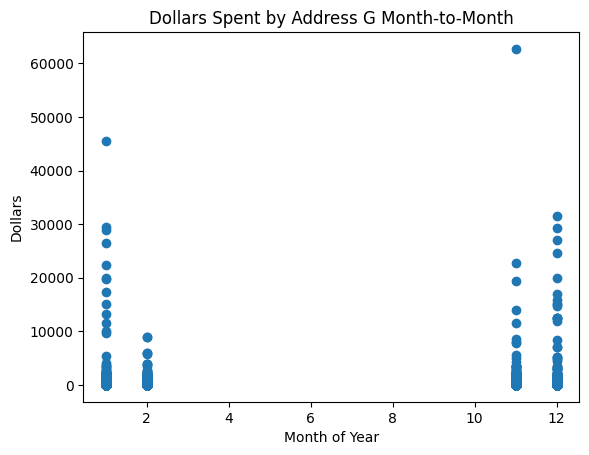

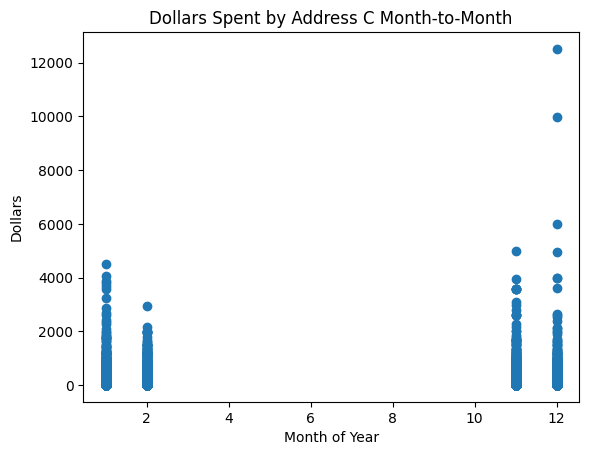

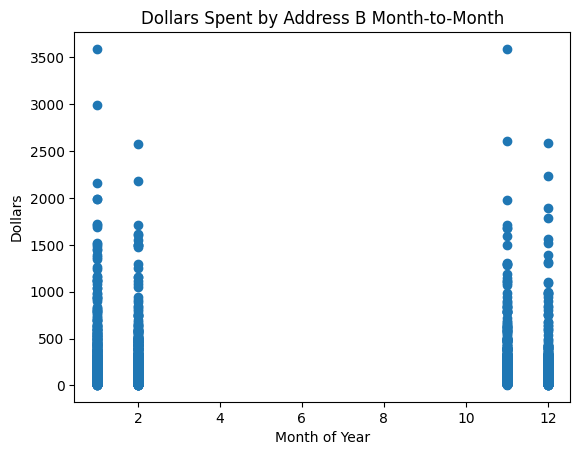

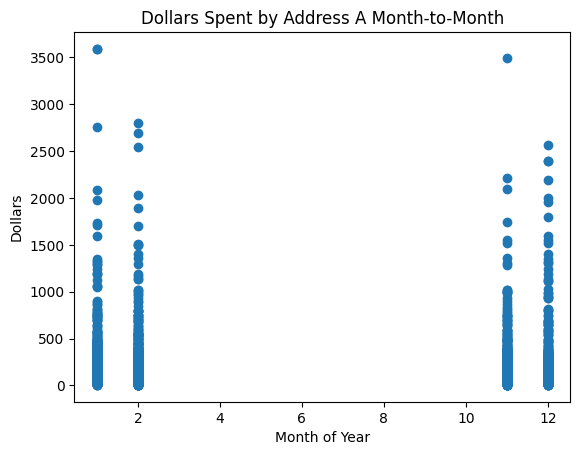

In [44]:
# Plot month-by-month of quantity sold
for address in churn['address'].unique():
    address_X = churn.loc[churn['address'] == address, ['month', 'dollar', 'address']]
    plt.scatter(address_X['month'], address_X['dollar'])
    plt.xlabel('Month of Year')
    plt.ylabel('Dollars')
    plt.title("Dollars Spent by Address {} Month-to-Month".format(address))
    plt.show()

**We could potentially conclude that certain areas by address have certain amount of dollars spent at this brand store. Another feature we could look at is quantities or dollars by month which could tell give an idea of sales per month.**

<Axes: >

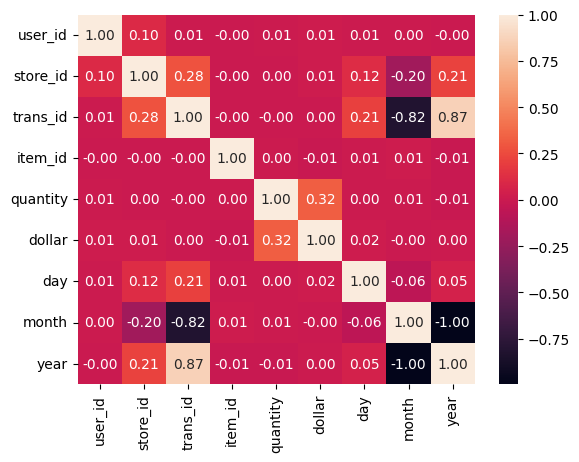

In [50]:
# Get a pairwise correlation of each of the columns in the DataFrame
num_columns = churn.select_dtypes(include = 'number').columns
sns.heatmap(churn[num_columns].corr(), annot=True, fmt= '.2f')

**Does appear to be a slight positive correlation between quantity and dollar features. Increasing of quantity, resulting in high dollar amounts spent at the store. Let's plot the correlation to see the data points.**

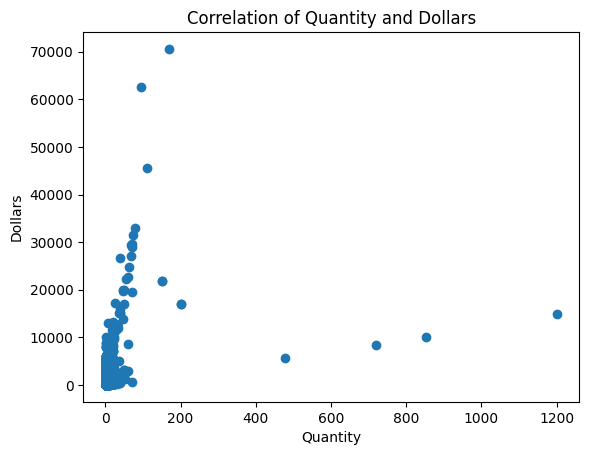

In [46]:
# Make plot of quantity sold by dollars 
plt.scatter(churn['quantity'], churn['dollar'])
plt.xlabel('Quantity')
plt.ylabel('Dollars')
plt.title("Correlation of Quantity and Dollars")
plt.show()

**There is a positive correlation between quantity and dollar we can see upon visualizing the data. There are a few outliers at higher quantities but lower price. Let's see what it looks like if we exclude these from the data.**

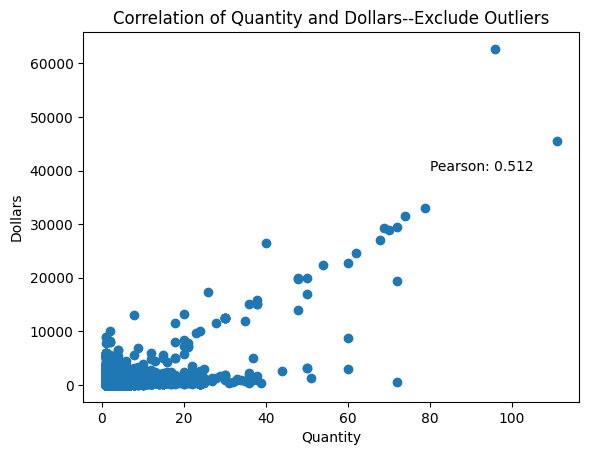

In [58]:
# Select for only quantity values that are less than 150 to exclude the outliers
data = churn.loc[churn['quantity'] < 150, ['dollar', 'quantity']]
plt.scatter(data['quantity'], data['dollar'])
plt.xlabel('Quantity')
plt.ylabel('Dollars')
plt.title("Correlation of Quantity and Dollars--Exclude Outliers")
plt.text(x=80, y=40000, s=f"Pearson: {round(stats.pearsonr(data['quantity'], data['dollar'])[0],3)}")
plt.show()

**Correlation looks much better when excluding the outliers from the data!**

### Results and Conclusions.

We used Exploratory Data Analysis using Pandas/Matplotlib libraries to explore and understand the retail-churn dataset. Upon reviewing the data, we identified datatypes that were read into the Pandas DataFrame were not appropriate for our analysis so needed to be changed. We answered obvious questions like whether there are negative quantities that were sold, and timespan of the dataset. Also answered non-trivial questions like looking feature relationships (visually/RSQ). We found that there is a positive correlation between Quantity sold and Dollars which should ideally be the case as quantity goes up, so does dollars spent. To find an even better correlation between these two features, we did end up excluding some outliers and saw an improvement in the relationship. 

### Citations

1. 2022 May, https://pandas.pydata.org/docs/reference/api.html
2. 2022 May, https://docs.python.org/3/library/datetime.html#datetime-objects
3. 2022 May, https://matplotlib.org/3.5.0/index.html